The purpose of this notebook is to develop a scoring function that converts binary masks into continuous ones.

In [2]:
from glob import glob
from scipy.misc import imread, imsave
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from os.path import exists
from os import mkdir
from shutil import rmtree

%matplotlib inline

#### Import masks

In [4]:
binary_mask_filepaths = glob('./Data/170729_Panel_Solos_Resized/CrackedMasks/*.png')
masks                 = np.zeros([len(binary_mask_filepaths), 185,  185, 1])
mask_names            = [None]*len(binary_mask_filepaths)

i = 0
for fp in binary_mask_filepaths:
    img = imread(fp)
    if len(img.shape) == 3:
        msk               = 1 - np.equal(img[:, :, 0], img[:, :, 1])
        masks[i, :, :, 0] = msk
        name              = fp.split('\\')[-1]
        mask_names[i]     = name
        i += 1
        
masks = masks[:i, :, :, :].squeeze()
mask_names = mask_names[:i]

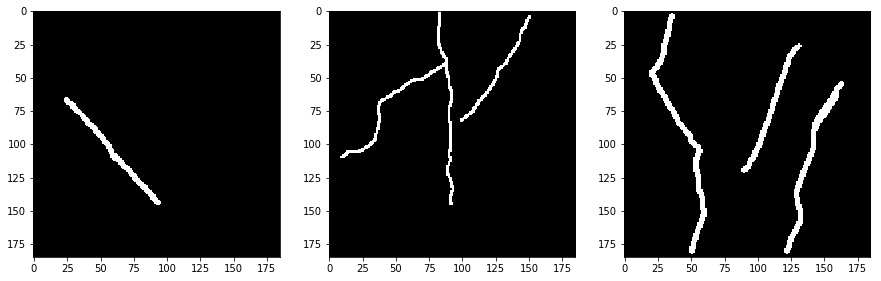

In [5]:
f, axs    = plt.subplots(1, 3, figsize = (15, 5))
random_ix = np.random.choice(range(i), 3)
for j, r in enumerate(random_ix):
    axs[j].imshow(masks[r, :, :], cmap = 'gray')

#### Convolve them with a $5\times5$ Gaussian kernel

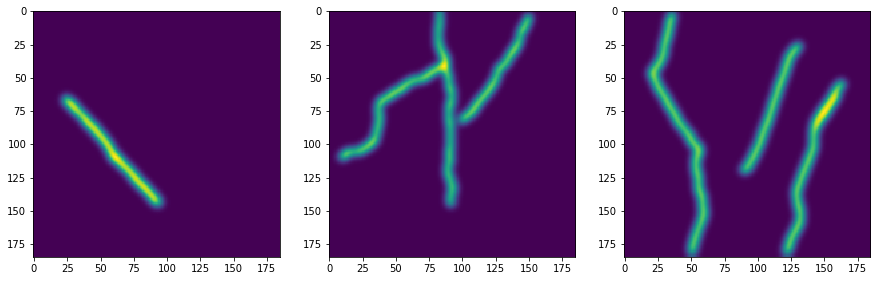

In [6]:
# Convolve the images with a 5x5 Gaussian kernel to obtain a continuous score
SD = [3, 3]
scores = np.array([gaussian_filter(m, sigma = SD) for m in masks])

f, axs    = plt.subplots(1, 3, figsize = (15, 5))
for j, r in enumerate(random_ix):
    axs[j].imshow(scores[r, :, :])

The thinking here is that the blurred masks will avoid unreasonably penalizing the classifier. For example it may be very close to the crack, but is not actually be located on a crack pixel - the blurring should provide a gradient that makes it possible for the classifier to adjust itself slightly.

In [7]:
dir_path = './Data/170729_Panel_Solos_Resized/CrackedScores/'

if exists(dir_path):
    rmtree(dir_path)
    
mkdir(dir_path)

for name, scr in zip(mask_names, scores):
    imsave(dir_path + name, scr)
    
print('Scores saved.')

Scores saved.


#### Generate empty masks for uncracked panels

In [10]:
dir_path = './Data/170729_Panel_Solos_Resized/UncrackedScores/'

if exists(dir_path):
    rmtree(dir_path)

mkdir(dir_path)

image_filepaths = glob('./Data/170729_Panel_Solos_Resized/Uncracked/*.png')
empty_mask = np.zeros([msk.shape[0], msk.shape[1]])

for fp in image_filepaths:
    name = fp.split('\\')[-1]
    imsave(dir_path + name, empty_mask)

print('Empty masks written.')

Empty masks written.
